# Introducción al aprendizaje automático con Scikit-Learn

![Scikit-Learn](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

In [0]:
import numpy as np # Matrices y algebra lineal
import matplotlib.pyplot as plt # Visualización

# Esta instrucción hace que todos los procesos estocásticos, si se ejecutan en
# el mismo orden, den el mismo resultado, por lo que hace el código reproducible
# para cualquiera.
np.random.seed(0)

## Introducción

[Scikit-Learn](https://scikit-learn.org/stable/) es una librería para __Python__ que contiene todos los elementos necesarios para desarrollar modelos de *machine learning*, tanto supervisados como no supervisados.

Es una libreria *open source* y su licencia permite que sea __utilizada comercialmente__, por lo que es la más usada en la industria en la actualidad.

Está desarrollada sobre las siguientes librerias:

* __numpy__: Motor de cálculo numérico y álgebra lineal [numpy.org](https://numpy.org/)
* __scipy__: Algorítmos para matemáticas, ciencia e ingeniería [scipy.org](https://www.scipy.org/)
* __matplotlib__: Librería utilizada para la visualización de datos [matplotlib.org](https://matplotlib.org/)


## Problemas de aprendizaje automático



Los problemas de *machine learning* tienen siempre una estructura parecida, a partir de $n$ observaciones de un fenómeno, caracterizadas por una seríe de variables independientes o *features* intentamos predecir propiedades desconocidas de los datos.

Formalmente este set de *features* se representa con una matriz $X_{ij}$, dónde el índice $i$ representa el número de cada observación y el índice $j$ el número de cada *feature*.

En el caso de los *problemas supervisados* queremos predecir un atributo $\hat{y}_{i}$ para nuevas observaciones, pero que es conocido para las observaciones que ya tenemos y ser representa como $y_{i}$.

Para ilustrar estos conceptos, vamos a utilizar el archiconocido dataset *iris*, que viene precargado como dataset de ejemplo en *scikit-learn*.

El dataset *iris* contienene 150 observaciones de flores de tres especies distintas: `setosa`, `virginica` y `versicolor`.

Cada observación está caracterizada por 4 *features*:

* `sepal length`: Longitud del sépalo en cm.

* `sepal width`: Anchura del sépalo en cm.

* `petal length`: Longitud del pétalo en cm.

* `petal width`: Anchura del pétalo en cm.

![example](https://i.ibb.co/Dfk6yjV/iris-example.png)

In [53]:
from sklearn.datasets import load_iris

dataset = load_iris() # Cargamos en memoria el dataset iris

X = dataset.data # Extraemos las features del problema
feature_names = dataset.feature_names # Extraemos los nombres

print("Nombre de las variables")
print(feature_names) # Escribimos los nombres de las variables
print("\nMuestra de las 5 primeras observaciones")
print(X[:5]) # Mostramos desde i = 0 a i = 4 observaciones 

Nombre de las variables
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Muestra de las 5 primeras observaciones
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Como podemos ver tenemos la matriz $X_{ij}$ cargada en memoria. 

Cada fila representa una flor distinta y cada columna una característica o *feature* de cada flor.

Por ejemplo, el componente $X_{00}$ sería el `sepal length` de la primera flor del dataset.
El componente $X_{32}$ sería el `petal length` de la cuarta flor del dataset.

*Cabe recordar que los índices en Python, como en otros lenguajes de programación, comienzan por 0 y no por 1.*

## Componentes de *scikit-learn*

La arquitectura de scikit-learn está [orientada a objetos](https://en.wikipedia.org/wiki/Object-oriented_programming), por lo que cada componente es un objeto que tenemos que construir antes de poder utilizar.

Todos los constructores de los componentes de *scikit-learn* siguen la misma lógica:

* `ClassName(**args)`: Dónde `args` son los *hiperparámetros* del componente. Estos hiperparámetros son características del componentes que no son modificadas durante el entrenamiento. Más abajo podemos ver algunos ejemplos. 

### Transformadores


Para multitud de algorítmos de aprendizaje automático, es necesario __transformar la matriz de variables independientes__ $X_{ij}$. En general esto se hace para normalizar los valores que tengan distintos ordenes de magnitud o para centrar en cero los valores de las variables.

Para esta tarea *scikit-learn* nos proporciona un tipo de componente: los __transformadores__.

Formalmente un transformador es una función $\phi$ que depende de unos parámetros $\theta_n$ (los cuales aprende de los propios datos) y que toma como entrada un set de variables independientes $X_{ij}$ y devuelve otro set $\hat{X}_{ik}$ tal que:

$$\hat{X}_{ik} = \phi(X_{ij}, \theta_n)$$

Podemos ver que para la matriz de salida el número de varibles puede cambiar (el índice $j$ se convierte en $k$). Aunque la mayoría de transformadores no modifican el número de variables de la matriz de entrada hay algunos que realizan *reducción dimensional* que se verán más adelante.

La API de *scikit-learn* para todos los transformadores es igual, e implementa dos métodos principales:

* `fit(X: np.array) -> self`: Este método es el encargado de *aprender* los parámetros $\theta_n$ para crear el transformador. Devuelve una referencia a sí mismo.

* `transform(X: np.array) -> np.array`: Es el método encargado de realizar la transformación. Debe ser llamado siempre después del método *fit*. Devuelve la matriz $\hat{X}_{ik}$. 

Para aterrizar los conceptos, vamos a aplicar un transformador sobre las variables independientes del dataset *iris*.

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1)) # Creamos el transformador
scaler = scaler.fit(X) # Aprendemos los parametros internos
X_scaled = scaler.transform(X) # Transformamos las features

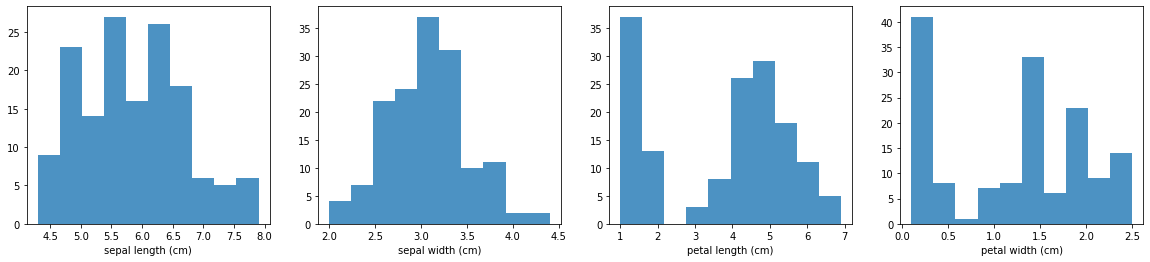

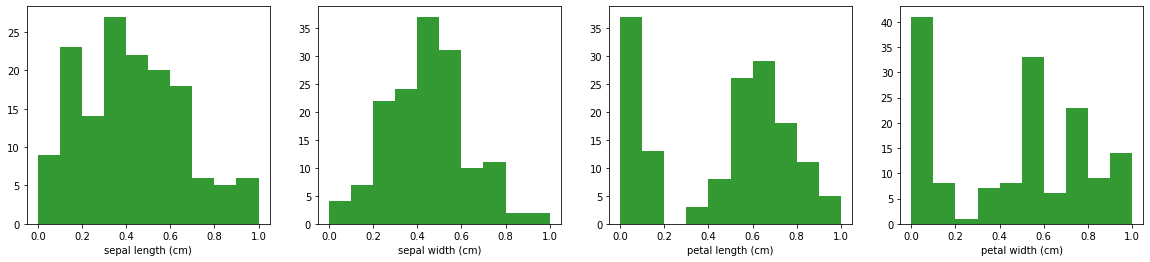

In [56]:
# Crea una fila con cuatro gráficos
fig, axes = plt.subplots(1, 4, figsize = (20, 4))

# Representamos un histograma para cada variable de la matriz original.
for i, ax in enumerate(axes):
  ax.hist(X[:, i], alpha = 0.8)
  ax.set_xlabel(feature_names[i])

# Crea una fila con cuatro gráficos
fig, axes = plt.subplots(1, 4, figsize = (20, 4))

# Representamos un histograma para cada variable de la matriz transformada.
for i, ax in enumerate(axes):
  ax.hist(X_scaled[:, i], color = "g", alpha = 0.8)
  ax.set_xlabel(feature_names[i])

### Estimadores

El siguiente componente principal de *scikit-learn* son los __estimadores__.

Podemos distinguir dos tipos de estimadores en función del tipo de problema que abordemos: los estimadores para aprendizaje no supervisado (*clustering*) y los estimadores para aprendizaje supervisado (*clasificadores* y *regresores*)

#### Aprendizaje no supervisado

Formalmente un estimador de aprendizaje no supervisado se puede definir como una función $\psi$ que depende de unos parámetros $\theta_n$ (los cuales aprende de los propios datos) y que toma como entrada un set de variables independientes $X_{ij}$ y devuelve una etiqueta $\hat{y}_{i}$ para cada observación $i$:

$$\hat{y}_{i} = \psi(X_{ij}, \theta_n)$$

Los estimadores para aprendizaje no supervisado implementan una API parecida a la de los transformadores, pero el método `transform` se convierte en el método `predict`.

Así tenemos dos métodos principales:

* `fit(X: np.array) -> self`: Este método es el encargado de *aprender* los parámetros $\theta_n$ para crear el modelo de clustering. Devuelve una referencia a sí mismo.

* `predict(X: np.array) -> np.array`: Es el método encargado de asignar a cada observación un cluster. Debe ser llamado siempre después del método *fit*. Devuelve el vector $\hat{y}_{i}$, con el índice del cluster para cada observación.

Como antes, vamos a aplicar un estimador de clustering sobre los datos de iris. 

Para poder visualizar mejor los clusters, vamos a utilizar sólo las 2 primeras *features*.


In [0]:
from sklearn.cluster import KMeans

In [0]:
# Construimos el estimador, fijando el numero de clusters a 3. Este numero es 
# un hiperparámetro que veremos más adelante como elegirlo.
kmeans = KMeans(n_clusters = 3)

# Llamamos al metodo fit del estimador. Es el "entrenamiento" del modelo que va
# a ajustar sus parámetros internos a la estructura de los datos.
kmeans.fit(X[:, :2])

# Una vez tenemos "entrenado" el modelo, asignamos a cada observación un cluster
# con el método predict.
y_hat = kmeans.predict(X[:, :2])

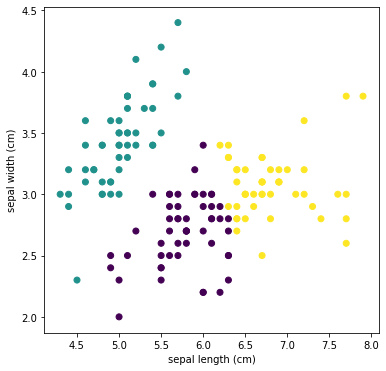

In [61]:
# Creamos una visualización con matplotlib

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.scatter(X[:, 0], X[:, 1], c = y_hat)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

plt.show()

#### Aprendizaje supervisado

Formalmente un estimador de aprendizaje supervisado se puede definir igual que un estimador no supervisado, una función $\psi$ que depende de unos parámetros $\theta_n$ y que toma como entrada un set de variables independientes $X_{ij}$ y devuelve una etiqueta $\hat{y}_{i}$ para cada observación $i$. Sin embargo, 
en este caso, los parámetros $\theta_n$ que aprende durante el entrenamiénto no
sólo dependen de los datos $X_{ij}$, sino también de las observaciones de la 
variable independiente $y_{i}$.

$$\hat{y}_{i} = \psi(X_{ij}, \theta_n)$$

En este caso la API de scikit-learn es:

* `fit(X: np.array, y: np.array) -> self`: Este método es el encargado de *aprender* los parámetros $\theta_n$ para crear el modelo supervisado. Como podemos ver en este caso depende de `X` e `y`. Devuelve una referencia a sí mismo.

* `predict(X: np.array) -> np.array`: Es el método encargado de asignar a cada observación un cluster. Debe ser llamado siempre después del método *fit*. Devuelve el vector $\hat{y}_{i}$, con la etiqueta (clasificación) o el valor (regresión) del modelo.

Para ilustrar el ejemplo vamos a crear un estimador para predecir la especie de
cada flor utilizando las 2 primeras variables para poder visualizar mejor los
resultados.

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Creamos el objeto que representa la regresión logística. Más adelante veremos
# el significado de los hiperparámetros.
logreg = LogisticRegression(multi_class = "auto", solver = "liblinear")

# Extraemos del dataset la especie de cada una de las observaciones.
y = dataset.target

# Entrenamos el modelo utilizando las variables dependientes y, en este caso,
# la variable independiente.
logreg.fit(X[:, :2], y)

# Predecimos para cada observación, la etiqueta que asignaría el modelo para
# evaluar su performance.
y_hat = logreg.predict(X[:, :2])

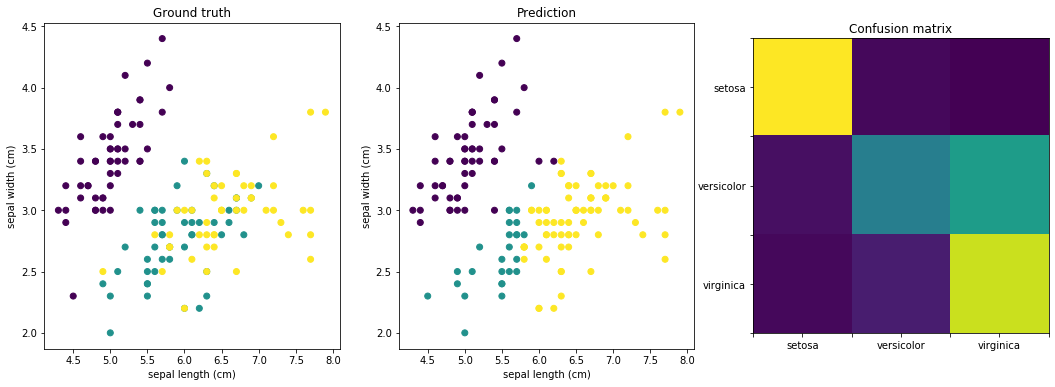

In [90]:
# Código para la visualización.
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 6))

ax.set_title("Ground truth")
ax.scatter(X[:, 0], X[:, 1], c = y)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

ax2.set_title("Prediction")
ax2.scatter(X[:, 0], X[:, 1], c = y_hat)
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])

ax3.set_title("Confusion matrix")
ax3.imshow(confusion_matrix(y, y_hat))

clabels = []
for name in dataset.target_names:
  clabels.append('')
  clabels.append(name)
ax3.set_xticklabels(clabels)
ax3.set_yticklabels(clabels)

plt.show()

### Pipelines

Por último tenemos los **pipelines**. Estos componentes permiten encapsular una serie de transformaciones con un estimador final en un solo objeto.

El constructor difiere del resto de componentes explicados anteriormente, y es
de la forma:

```
  Pipeline([
    ('alias_trans_1', trans_1),
    ('alias_trans_2', trans_2),
    ...
    ('alias_estimador', estimador)
  ])
````

Los métodos `fit` y `predict` coinciden con aquellos del *estimador* utilizado
para el *pipeline*.



In [0]:
from sklearn.pipeline import Pipeline

# Antes de nada construimos dos objetos:
# * Un transformador utilizando MinMaxScaler
# * Un algoritmo de clustering utilizando KMeans
min_max_transformer = MinMaxScaler(feature_range=(0, 1))
kmeans = KMeans(n_clusters=3)

# Creamos el objeto Pipeline, utilizando una lista con los objetos creados.
# Cada elemento de la lista es una tupla con un alias para el objeto y el
# objeto creado anteriormente.
pipeline = Pipeline([
  ("transformer_1", min_max_transformer),
  ("cluster_alg", kmeans)
])

# Entrenamos el modelo conjuntamente. Este método va a entrenar el primer 
# transformador, transformar los datos y posteriormente entrenar el estimador.
pipeline.fit(X[:, : 2])

# Predecimos con el pipeline.
y_hat = pipeline.predict(X[:, :2])

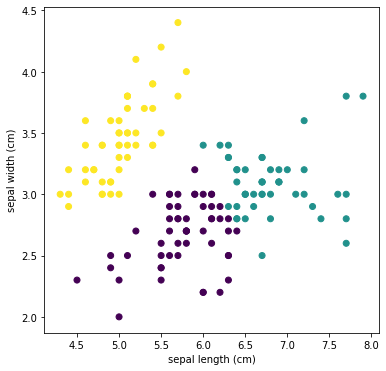

In [94]:
# Creamos una visualización con matplotlib

fig, ax = plt.subplots(1, 1, figsize = (6, 6))

ax.scatter(X[:, 0], X[:, 1], c = y_hat)
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])

plt.show()

# Ejercicio

A un servidor ftp de cierta empresa llegan `3` tipos de archivos distintos, de 
los que se desconoce su procedencia. Por motivos de privacidad, sólo se tiene
información sobre el `número de palabras` y el `tamaño` de cada uno de los archivos. En base a estas variables, y para poder organizar el ftp, se quiere asignar a cada archivo su grupo correspondiente.

* ¿Qué tipo de problema de aprendizaje automático tenemos?

* Crear un estimador de los que se han visto que sea apropiado para el tipo de
problema y asignar un grupo a cada archivo. Crear una visualización utilizando la función `plot_clusters(X, labels)`.

* Crear un `Pipeline` con una transformación `MinMaxScaler` y el estimador correspondiente y volver a crear una visualización. ¿Han mejorado los grupos? ¿A qué puede ser debido?


Los datos están cargados en la variable X, y tienen la siguiente forma:

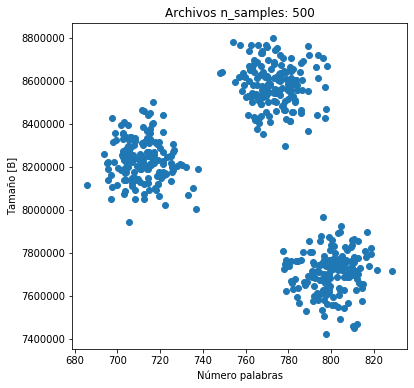

In [48]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples = 500, n_features = 2, centers = 3, 
                  cluster_std = 0.1, random_state = 0, center_box=(5.0, 10.0))
X[:, 0] *= 1e2
X[:, 1] *= 1e6

def plot_clusters(X, labels = None):
  """ Crea un gráfico que representa los clusters del problema.
  Args:
    X (np.Array): Array bidimensional de dimensiones (n_samples, 2).
    labels (np.Array): Array unidimensional con las etiquetas para cada grupo.
  """
  fig, ax = plt.subplots(figsize = (6, 6))
  ax.scatter(X[:, 0], X[:, 1], c = labels)
  ax.set_title(f"Archivos n_samples: {X.shape[0]}")
  ax.set_ylabel("Tamaño [B]")
  ax.set_xlabel("Número palabras")
  plt.show()

plot_clusters(X)